In [1]:
from mikeio import Dfsu

filename = "../tests/testdata/HD2D.dfsu"
dfs = Dfsu()

ds = dfs.read(filename)

ds

DataSet(data, time, items)
Number of items: 4
Shape: (9, 884)
1985-08-06 07:00:00 - 1985-08-07 03:00:00

Find which element is closest to POI.

In [2]:
idx = dfs.find_closest_element_index(606200, 6905480)

Extract a subset of the dataset from this element. (Discrete values, no interpolation)

In [3]:
selds = ds.isel(idx=idx)
selds

DataSet(data, time, items)
Number of items: 4
Shape: (9,)
1985-08-06 07:00:00 - 1985-08-07 03:00:00

Convert to a dataframe, for convenience.

In [4]:
df = selds.to_dataframe()
df.head()

,Surface elevation,U velocity,V velocity,Current speed
1985-08-06 07:00:00,0.459460,0.006372,-0.007143,0.009572
1985-08-06 09:30:00,0.806965,0.010517,0.003438,0.011064
1985-08-06 12:00:00,0.100285,0.011300,0.012926,0.017169
1985-08-06 14:30:00,-0.727009,0.010402,0.010033,0.014452
1985-08-06 17:00:00,-0.579541,0.007293,-0.000902,0.007349


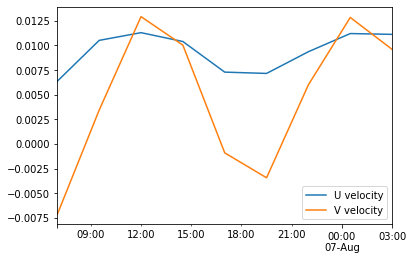

In [5]:
df[["U velocity","V velocity"]].plot()

# Create a new dfsu file

* Subset of items
* Subset of timesteps
* Renamed variables

First inspect the source file:

In [6]:
ds

DataSet(data, time, items)
Number of items: 4
Shape: (9, 884)
1985-08-06 07:00:00 - 1985-08-07 03:00:00

In [7]:
ds.items

[Surface elevation <Surface Elevation> (meter),
 U velocity <u velocity component> (meter per sec),
 V velocity <v velocity component> (meter per sec),
 Current speed <Current Speed> (meter per sec)]

In [8]:
from mikeio.eum import ItemInfo, EUMType

sourcefilename = filename
outfilename = "HD2D_selected.dfsu"

data = []

starttimestep = 4

data.append(ds['U velocity'][starttimestep:,:])
data.append(ds['V velocity'][starttimestep:,:])

time = ds.time[starttimestep:]

items = [ItemInfo("eastward_sea_water_velocity", EUMType.u_velocity_component),
         ItemInfo("northward_sea_water_velocity",EUMType.v_velocity_component)]

dt = (time[1] - time[0]).total_seconds()

dfs.create(sourcefilename, outfilename, data, items=items, start_time=time[0], dt=dt)

Read the newly created file to verify the contents.

In [9]:
newds = dfs.read(outfilename)
newds

DataSet(data, time, items)
Number of items: 2
Shape: (5, 884)
1985-08-06 17:00:00 - 1985-08-07 03:00:00

In [10]:
newds.items

[eastward_sea_water_velocity <u velocity component> (meter per sec),
 northward_sea_water_velocity <v velocity component> (meter per sec)]

# Clean up

In [11]:
import os
os.remove(outfilename)